In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
# RGB2GRAY
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [4]:
# convolution
def conv2d(img, kernel, padding='same'):
    # Error handling
    if kernel.shape[0] != kernel.shape[1]:
        print("Use square filter!")
        return None
    
    if kernel.shape[0]%2 == 0 and kernel.shape[1]%2 == 0:
        print("filter size has to be odd")
        return None
    
    # Create result matrix
    result = np.zeros_like(img)
    
    # Calculate kernel size
    kernel_size = kernel.shape[0]
    
    # same padding
    if padding=='same':
        pad_size = int((kernel_size - 1) / 2)
    else:
        pad_size = 0
    img = np.pad(img, pad_size, mode='constant')
    
    # convolution
    width, height = img.shape
    offset = int(kernel_size / 2)
    for x in range(offset, width-offset):
        for y in range(offset, height-offset):
            result[x-offset, y-offset] = np.sum(img[x-offset:x+offset+1, y-offset:y+offset+1] * kernel)
            
    return result

In [5]:
def grad_x(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return conv2d(img, kernel=sobel_x)

In [6]:
def grad_y(img):
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return conv2d(img, kernel=sobel_y)

In [51]:
def cornerDetect(img, winSize=7, type=0):
    """
    Parameters:
        img = image (grayscale)
        winSize = total size of window for summation in pixels,
        type = {0 - Eigenvalue, 1 - Harris}
    """
    # create empty matrix for result
    result = np.zeros_like(img)
    
    # get image size
    width, height = img.shape
    
    # compute derivatives using sobel kernel
    I_x = grad_x(img)
    I_y = grad_y(img)
    
    # For each pixel in img, determine second moment matrix H summed up over the window
    Ixx = I_x ** 2
    Ixy = I_y * I_x
    Iyy = I_y ** 2
    
    # Create matrix for saving second moment
    Sxx = np.zeros_like(Ixx)
    Sxy = np.zeros_like(Ixy)
    Syy = np.zeros_like(Iyy)
    
    # same padding
    pad_size = int((winSize - 1) / 2)
    Ixx = np.pad(Ixx, pad_size, mode='constant')
    Ixy = np.pad(Ixy, pad_size, mode='constant')
    Iyy = np.pad(Iyy, pad_size, mode='constant')
    
    # Calculate second moment matrix H summed up over the window
    offset = int(winSize / 2)
    for x in range(offset, width-offset):
        for y in range(offset, height-offset):
            Sxx[x-offset, y-offset] = np.sum(Ixx[x-offset:x+offset+1, y-offset:y+offset+1])
            Sxy[x-offset, y-offset] = np.sum(Ixy[x-offset:x+offset+1, y-offset:y+offset+1])
            Syy[x-offset, y-offset] = np.sum(Iyy[x-offset:x+offset+1, y-offset:y+offset+1])
    
    # Eigenvalue
    if type==0:
        #lambda1 = 0.5 * ((Sxx + Syy) + np.sqrt(4*Sxy**2 + (Sxx - Syy)**2))
        lambda2 = 0.5 * ((Sxx + Syy) - np.sqrt(4*Sxy**2 + (Sxx - Syy)**2))
        result[lambda2 > 10000] = 255
    # Harris
    elif type==1:
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - 0.04*(trace**2)
        result[r > 10000] = 255
        
    return result

### 1. Eigenvalue corner detection

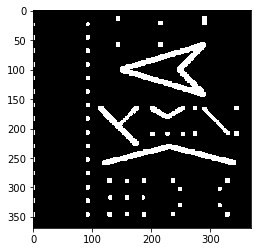

In [47]:
# read image
img = mpl.image.imread("img74.gif")
img = rgb2gray(img)
result = cornerDetect(img, winSize=7, type=0)
plt.imshow(result, cmap='gray')

### 2. Harris corner detection

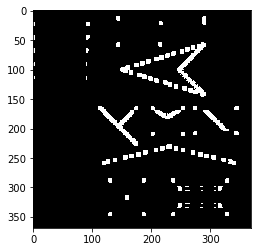

In [50]:
# read image
img = mpl.image.imread("img74.gif")
img = rgb2gray(img)
result = cornerDetect(img, winSize=7, type=1)
plt.imshow(result, cmap='gray')